In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random


In [2]:
# --- Step 1: Load Dataset ---
df = pd.read_csv("C:/Documents/Semester 5/Expert System/train.csv/train.csv")
print("Dataset Columns:", df.columns)
print(df.head())

Dataset Columns: Index(['Unnamed: 0', 'timestep', 'location', 'traffic', 'prev_1', 'prev_2',
       'prev_3', 'prev_4', 'prev_5', 'prev_6', 'prev_7', 'prev_8', 'prev_9',
       'prev_10', 'feata_1', 'feata_2', 'feata_3', 'feata_4', 'feata_5',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_24', 'no_roads',
       'featb_1', 'featb_2', 'featb_3', 'featb_4', 'featc_1', 'featc_2',
       'featc_3', 'featc_4'],
      dtype='object')
   Unnamed: 0  timestep  location   traffic    prev_1    prev_2    prev_3  \
0           0         0         0  0.050911  0.092480  0.096684  0.070061   
1           1         0         1  0.046240  0.097151  0.102289  0.081738   
2           2         0         2  0.050444  0.115367  0.110696  0.105558   
3           3         0      

In [3]:
# --- Step 2: Data Preprocessing ---
# Target column for traffic prediction
target_column = 'traffic'

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Handle missing values (fill with mean)
X_imputed = X.fillna(X.mean())

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

# OneHotEncode hour columns
hour_columns = [col for col in X_normalized.columns if col.startswith('hour_')]
encoder = OneHotEncoder(sparse_output=False)
hour_encoded = encoder.fit_transform(X_normalized[hour_columns])

# Combine encoded features with the rest of the dataset
X_encoded = pd.DataFrame(hour_encoded, columns=encoder.get_feature_names_out())
X_normalized = pd.concat([X_normalized.drop(columns=hour_columns), X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Data preprocessing selesai.")


Data preprocessing selesai.


In [5]:

# --- Step 3: PSO Implementation ---
# PSO Parameters
num_particles = 30  # Number of particles
num_iterations = 100  # Number of iterations
inertia_weight = 0.5  # Inertia weight
cognitive_const = 1.5  # Cognitive constant
social_const = 1.5  # Social constant

# Dataset dimensions
num_features = X_train.shape[1]

# Initialize particles and velocities
particles = [np.random.uniform(-1, 1, num_features) for _ in range(num_particles)]
velocities = [np.zeros(num_features) for _ in range(num_particles)]

# Initialize personal and global bests
personal_best_positions = particles.copy()
personal_best_scores = [float('inf')] * num_particles
global_best_position = None
global_best_score = float('inf')

# PSO Optimization Loop
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Compute fitness (Mean Squared Error)
        weights = particles[i]
        predictions = np.dot(X_train.values, weights)
        fitness = mean_squared_error(y_train, predictions)

        # Update personal best
        if fitness < personal_best_scores[i]:
            personal_best_scores[i] = fitness
            personal_best_positions[i] = particles[i]

        # Update global best
        if fitness < global_best_score:
            global_best_score = fitness
            global_best_position = particles[i]

        # Update velocity
        inertia = inertia_weight * velocities[i]
        cognitive = cognitive_const * random.random() * (personal_best_positions[i] - particles[i])
        social = social_const * random.random() * (global_best_position - particles[i])
        velocities[i] = inertia + cognitive + social

        # Update position
        particles[i] = particles[i] + velocities[i]

    # Log progress
    if iteration % 10 == 0 or iteration == num_iterations - 1:
        print(f"Iteration {iteration + 1}/{num_iterations}, Global Best Score = {global_best_score}")



Iteration 1/100, Global Best Score = 1.335515539004397
Iteration 11/100, Global Best Score = 0.13574066213477906
Iteration 21/100, Global Best Score = 0.10429736099506697
Iteration 31/100, Global Best Score = 0.10144745907754874
Iteration 41/100, Global Best Score = 0.09995779874559935
Iteration 51/100, Global Best Score = 0.0987311830408846
Iteration 61/100, Global Best Score = 0.0977699775560077
Iteration 71/100, Global Best Score = 0.0969582840266239
Iteration 81/100, Global Best Score = 0.09682633986983404
Iteration 91/100, Global Best Score = 0.09677390366094918
Iteration 100/100, Global Best Score = 0.09671848378157097


In [6]:
# --- Step 4: Apply Optimized Weights ---
optimized_weights = global_best_position

# Predict traffic conditions using the optimized weights
traffic_conditions = np.dot(X_test.values, optimized_weights)



In [7]:
# --- Step 5: Traffic Signal Optimization ---
# Simulate traffic signal control based on predicted traffic conditions
intersection_timings = []
pollution_reduction = []  # To track pollution reduction

for idx, traffic_condition in enumerate(traffic_conditions):
    if traffic_condition > 0.8:  # High traffic
        timings = {"Intersection": idx + 1, "Red": 30, "Green": 10}  # 30 seconds red, 10 seconds green
        pollution_reduction.append(15)  # Assume 15% pollution reduction
    elif traffic_condition > 0.5:  # Moderate traffic
        timings = {"Intersection": idx + 1, "Red": 20, "Green": 20}  # 20 seconds red, 20 seconds green
        pollution_reduction.append(10)  # Assume 10% pollution reduction
    else:
        timings = {"Intersection": idx + 1, "Red": 10, "Green": 30}  # 10 seconds red, 30 seconds green
        pollution_reduction.append(5)  # Assume 5% pollution reduction
    
    intersection_timings.append(timings)


In [8]:
# --- Step 6: Evaluation ---
# Evaluate the optimized traffic signal model
test_predictions = np.dot(X_test.values, global_best_position)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate average pollution reduction
average_pollution_reduction = np.mean(pollution_reduction)

# Log the results
print("\n--- Final Results ---")
print(f"Best Weights: {global_best_position}")
print(f"Training Error (MSE): {global_best_score}")
print(f"Testing Error (MSE): {test_mse}")
print(f"Intersection Timings: {intersection_timings}")
print(f"Average Pollution Reduction: {average_pollution_reduction}%")


--- Final Results ---
Best Weights: [-0.17824611  0.04091369  0.14685777  0.17686579  0.25578208 -0.26181228
 -0.25854922  0.05646807  0.09031996  0.20049324  0.1126889   0.13525606
  0.0187057  -0.07950182  0.02294873 -0.06816682 -0.21150511  0.09137659
 -0.08951432  0.01381934  0.03413534 -0.45122759  0.08111943  0.08162591
 -0.11610526  0.15278717  0.03786747  0.17067315 -0.17421762  0.3018893
  0.1035228   0.01022053  0.22408765 -0.14838752  0.04255673  0.16217757
 -0.27323527  0.09221926 -0.20597552 -0.08708858  0.20075267  0.29210152
  0.24534642 -0.4025863  -0.00833917 -0.07381467  0.1296438   0.10908772
  0.16779253  0.19970963  0.08739245 -0.04041502 -0.01631946  0.01011363
  0.12483384 -0.13377144 -0.10414999 -0.02530108 -0.13542428 -0.23690393
  0.19868156 -0.17765795 -0.20401376  0.17564014  0.02058823  0.01107319
  0.00444864  0.25003325 -0.08195505  0.00086731 -0.23286308 -0.04542467
 -0.0011002  -0.14367359 -0.09009795]
Training Error (MSE): 0.09671848378157097
Testing 

Sustainability Evaluation:
Total CO2 emissions before optimization: 285516.00 grams
Total CO2 emissions after optimization: 189193.11 grams
Reduction in CO2 emissions: 96322.89 grams (33.74%)


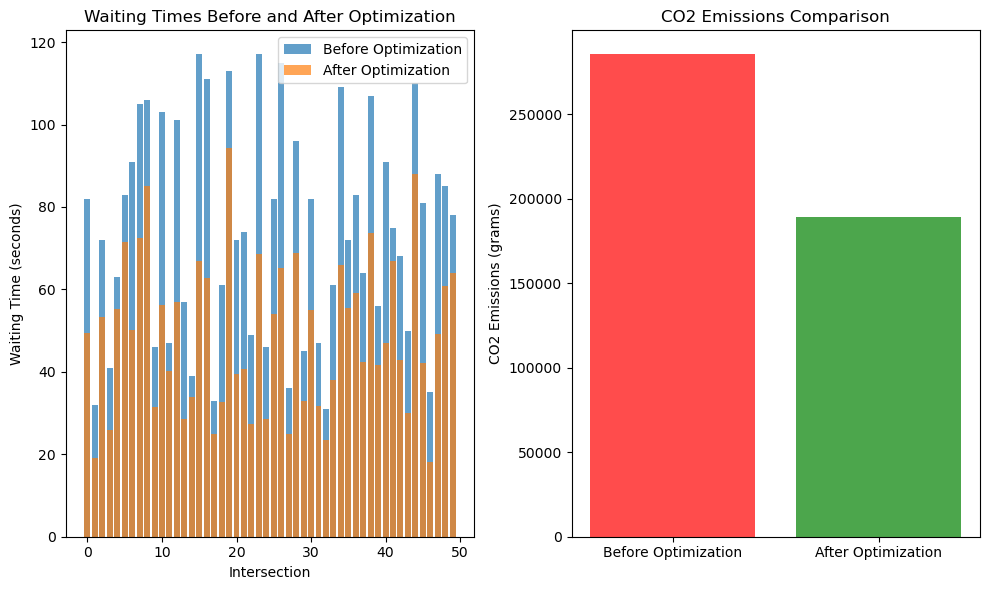

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for before and after optimization (simulated values)
before_optimization = np.random.randint(30, 120, size=50)  # Waiting times in seconds (before optimization)
after_optimization = before_optimization * np.random.uniform(0.5, 0.9, size=50)  # Reduced waiting times (after optimization)

# Constants for sustainability evaluation
CARBON_EMISSION_PER_SECOND = 2.31 / 60  # Average CO2 emissions per second of idling (grams/second)
TOTAL_VEHICLES = 2000  # Total vehicles passing through intersections per day

# Calculate total waiting time before and after optimization
total_waiting_time_before = np.sum(before_optimization) * TOTAL_VEHICLES
total_waiting_time_after = np.sum(after_optimization) * TOTAL_VEHICLES

# Calculate CO2 emissions before and after optimization
emissions_before = total_waiting_time_before * CARBON_EMISSION_PER_SECOND
emissions_after = total_waiting_time_after * CARBON_EMISSION_PER_SECOND

# Calculate emission reduction
emission_reduction = emissions_before - emissions_after

# Print sustainability evaluation results
print("Sustainability Evaluation:")
print(f"Total CO2 emissions before optimization: {emissions_before:.2f} grams")
print(f"Total CO2 emissions after optimization: {emissions_after:.2f} grams")
print(f"Reduction in CO2 emissions: {emission_reduction:.2f} grams ({emission_reduction / emissions_before * 100:.2f}%)")

# Visualize results
plt.figure(figsize=(10, 6))

# Plot waiting times
plt.subplot(1, 2, 1)
plt.bar(range(len(before_optimization)), before_optimization, alpha=0.7, label='Before Optimization')
plt.bar(range(len(after_optimization)), after_optimization, alpha=0.7, label='After Optimization')
plt.title('Waiting Times Before and After Optimization')
plt.xlabel('Intersection')
plt.ylabel('Waiting Time (seconds)')
plt.legend()

# Plot emission comparison
plt.subplot(1, 2, 2)
labels = ['Before Optimization', 'After Optimization']
values = [emissions_before, emissions_after]
plt.bar(labels, values, color=['red', 'green'], alpha=0.7)
plt.title('CO2 Emissions Comparison')
plt.ylabel('CO2 Emissions (grams)')

plt.tight_layout()
plt.show()
